# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.265311e+01     7.247120e+00
 * time: 0.0023620128631591797
     1     2.981555e+01     4.991079e+00
 * time: 0.007483959197998047
     2     2.071218e+01     5.540013e+00
 * time: 0.013516902923583984
     3     1.580048e+01     5.268228e+00
 * time: 0.07304096221923828
     4     1.161389e+01     1.733710e+00
 * time: 0.07726407051086426
     5     9.467003e+00     1.035882e+00
 * time: 0.08194589614868164
     6     8.926101e+00     1.035557e+00
 * time: 0.08571195602416992
     7     8.646497e+00     7.909757e-01
 * time: 0.08930206298828125
     8     8.474192e+00     5.930613e-01
 * time: 0.09282398223876953
     9     8.361333e+00     5.244057e-01
 * time: 0.09636187553405762
    10     8.294165e+00     3.737632e-01
 * time: 0.10261702537536621
    11     8.249001e+00     6.081381e-01
 * time: 0.1054530143737793
    12     8.199885e+00     3.436339e-01
 * time: 0.10813307762145996
    13     8.150657e+00     5.187326e-01
 * ti

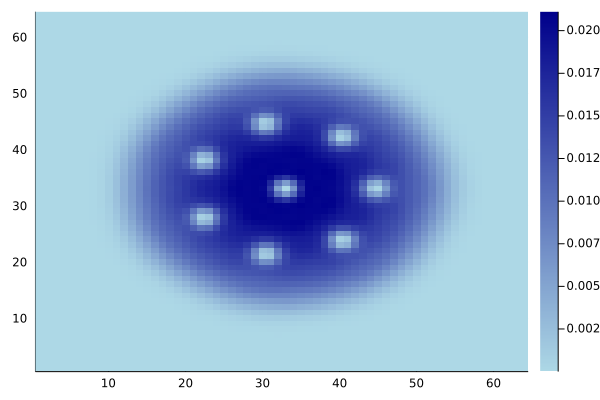

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)